# Data Science and Engineering Methods

Name : Shreyas Madhusudan Dasari

NUID : 002743612

# Assignment 1: ML Data Cleaning and Feature Selection

ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

Scoring Rubric

Are my answers supported with data? (20 Points)

Tables, graphs, and charts must support your evaluation/answers.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)

 

Public dataset (5 Points)

Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.

 

What code is yours and what have you adapted? (5 Points)

You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.

 

Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.

 

Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.

 

Answers to listed questions (45 Points)

 

* Which independent variables are useful to predict a target (dependent variable)?

* Which independent variable have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013) Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

# Abstract

The objective is to evaluate a dataset on diabetes prediction using diagnostic measures. The data includes details on a number of measurements, including body mass index, blood pressure, and insulin levels. The following topics are addressed using statistical techniques like p-value and t-statistics as well as visualization methods like histograms, Q-Q plots, line plots, and box plots using Python's matplotlib and seaborn libraries:

• Which independent variables are useful in predicting the target (diabetes)?

• Which independent variables have missing data and how much?

• Are the training and test sets similar?

• Are the predictor variables independent of each other?

• What are the most important predictor variables?

• Do the ranges of the predictor variables make sense?

• What are the distributions of the predictor variables?

The results demonstrate that the data is accurate and free of any missing or conflicting values. All independent variables were examined for significance in the predictors, and it was discovered that they are all significant. With the use of these results, the diabetes prediction model can be enhanced to make predictions that are more precise.

# Dataset


*   What are the data types? (Only numeric and categorical)



The data set consists of :

1.   8 diagnostic measures to predict diabetes  i.e. 'cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp' - The independent variables
2.   Diabetes - The dependent variable
3.   The category of diabetes ranges from 0(No) to 1(Yes)
4.   There are a total of 390 observations






In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as pyplot

In [304]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [305]:
df = pd.read_csv("https://raw.githubusercontent.com/ShreyasDasari/Data-Science-and-ML/main/ML%20Data%20Cleaning%20and%20Feature%20Selection/diabetes.csv")
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [306]:
df.shape

(390, 16)

# Removing Fields which are not important

In [307]:
df.drop(['chol_hdl_ratio','bmi','waist','hip','waist_hip_ratio'],inplace=True, axis=1)
df.head()

,patient_number,cholesterol,glucose,hdl_chol,age,gender,height,weight,systolic_bp,diastolic_bp,diabetes
0,1,193,77,49,19,female,61,119,118,70,No diabetes
1,2,146,79,41,19,female,60,135,108,58,No diabetes
2,3,217,75,54,20,female,67,187,110,72,No diabetes
3,4,226,97,70,20,female,64,114,122,64,No diabetes
4,5,164,91,67,20,female,70,141,122,86,No diabetes




*   Are there missing values?




In [308]:
df.isnull().sum()

patient_number    0
cholesterol       0
glucose           0
hdl_chol          0
age               0
gender            0
height            0
weight            0
systolic_bp       0
diastolic_bp      0
diabetes          0
dtype: int64

# Performing One-Hot Encoding for Gender feature

In [309]:
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')
gender_encoded

,gender_female,gender_male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
385,1,0
386,1,0
387,1,0
388,1,0


Gender feature has been encoded into two different columns

In [310]:
# Concatenate the encoded column with the original dataframe
df = pd.concat([df, gender_encoded], axis=1)
df.head()

,patient_number,cholesterol,glucose,hdl_chol,age,gender,height,weight,systolic_bp,diastolic_bp,diabetes,gender_female,gender_male
0,1,193,77,49,19,female,61,119,118,70,No diabetes,1,0
1,2,146,79,41,19,female,60,135,108,58,No diabetes,1,0
2,3,217,75,54,20,female,67,187,110,72,No diabetes,1,0
3,4,226,97,70,20,female,64,114,122,64,No diabetes,1,0
4,5,164,91,67,20,female,70,141,122,86,No diabetes,1,0


In [311]:
#dropping patient_number and gender columns
df.drop(['patient_number','gender'],inplace=True, axis=1)
df.head()

,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,diabetes,gender_female,gender_male
0,193,77,49,19,61,119,118,70,No diabetes,1,0
1,146,79,41,19,60,135,108,58,No diabetes,1,0
2,217,75,54,20,67,187,110,72,No diabetes,1,0
3,226,97,70,20,64,114,122,64,No diabetes,1,0
4,164,91,67,20,70,141,122,86,No diabetes,1,0


In [312]:
#converting diabetes feature into 0 and 1
df['is_diab'] = df['diabetes'].map({'Diabetes':1,'No diabetes':0})
df['is_diab']
df.head()

,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,diabetes,gender_female,gender_male,is_diab
0,193,77,49,19,61,119,118,70,No diabetes,1,0,0
1,146,79,41,19,60,135,108,58,No diabetes,1,0,0
2,217,75,54,20,67,187,110,72,No diabetes,1,0,0
3,226,97,70,20,64,114,122,64,No diabetes,1,0,0
4,164,91,67,20,70,141,122,86,No diabetes,1,0,0


<Figure size 576x360 with 0 Axes>

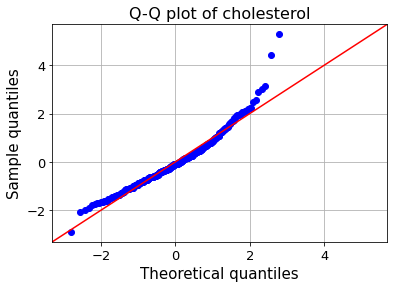

<Figure size 576x360 with 0 Axes>

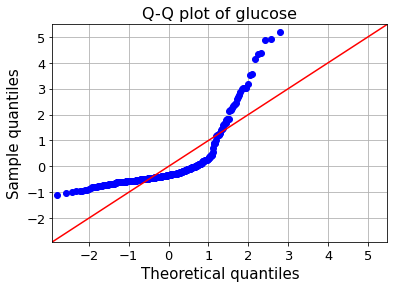

<Figure size 576x360 with 0 Axes>

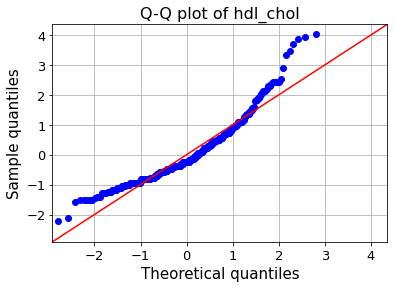

<Figure size 576x360 with 0 Axes>

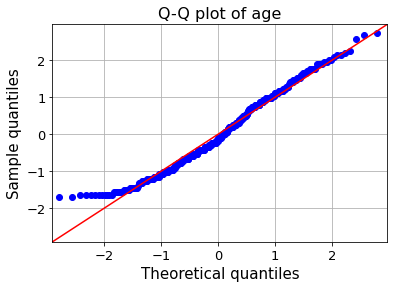

<Figure size 576x360 with 0 Axes>

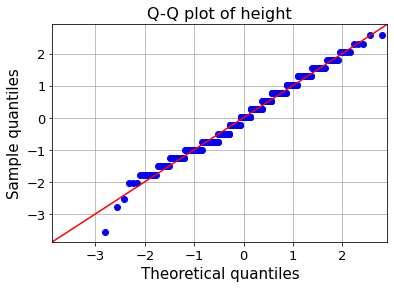

<Figure size 576x360 with 0 Axes>

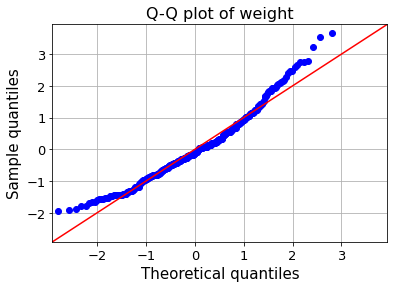

<Figure size 576x360 with 0 Axes>

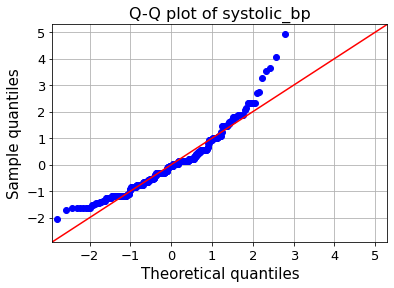

<Figure size 576x360 with 0 Axes>

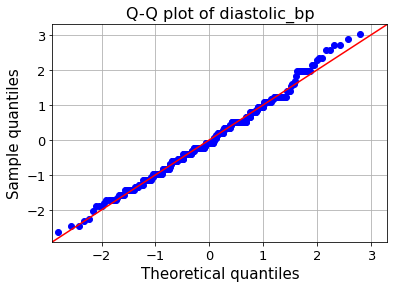

<Figure size 576x360 with 0 Axes>

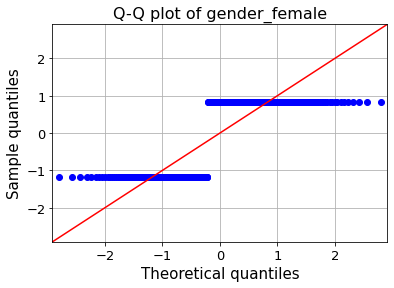

<Figure size 576x360 with 0 Axes>

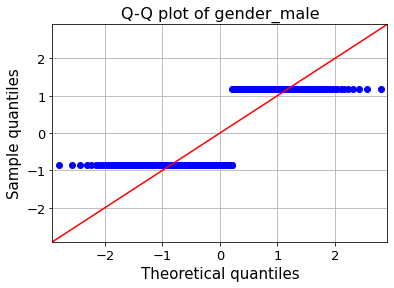

In [313]:
#Plotting qq-plot for all the features
from statsmodels.graphics.gofplots import qqplot
data = df[['cholesterol','glucose','hdl_chol','age','height','weight','systolic_bp','diastolic_bp','gender_female','gender_male']]
for c in data.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()



1.   Looking at the Q-Q plot above, it appears that all independent variables are roughly following normal distribution except glucose
2.   There are few outliers in few of the predictor variables like in glucose, Cholestrol, Weight, Diastolic_bp



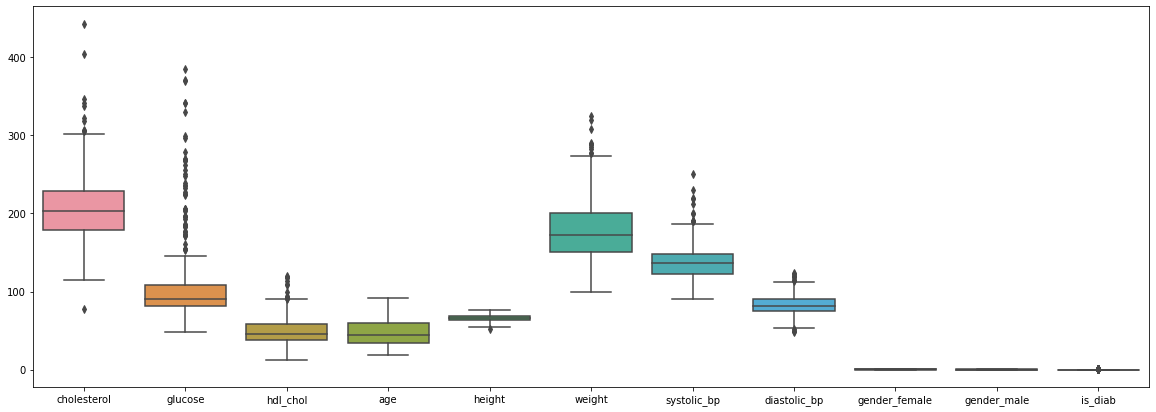

In [314]:
#Boxplot to identify outliers
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

It has been observed that glucose has most outliers and cholestrol, hdl_chol, systolic_bp, diastolic_dp also have a few outliers.

# Data transforming, Feature creation and Analysis

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


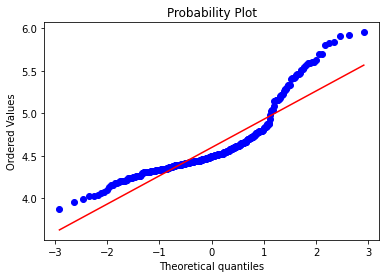

In [315]:
# Normalizing glucose data as its not aligned according to the qq-plot

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import scipy.stats as stats

# Create x to store scaled values as floats
x = data[['glucose']]


# Apply log transformation to the column
x_scaled = np.log(x)

# Run the normalizer on the dataframe
data[['glucose']] = pd.DataFrame(x_scaled)

# Plot the Q-Q plot
stats.probplot(data['glucose'], dist="norm", plot=plt)
plt.show()

In [316]:
#Description of the dataset
df.describe()

,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,gender_female,gender_male,is_diab
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,46.774359,65.951282,177.407692,137.133333,83.289744,0.584615,0.415385,0.153846
std,44.666005,53.798188,17.279069,16.435911,3.918867,40.407824,22.859528,13.498192,0.493421,0.493421,0.361265
min,78.000000,48.000000,12.000000,19.000000,52.000000,99.000000,90.000000,48.000000,0.000000,0.000000,0.000000
25%,179.000000,81.000000,38.000000,34.000000,63.000000,150.250000,122.000000,75.000000,0.000000,0.000000,0.000000
50%,203.000000,90.000000,46.000000,44.500000,66.000000,173.000000,136.000000,82.000000,1.000000,0.000000,0.000000
75%,229.000000,107.750000,59.000000,60.000000,69.000000,200.000000,148.000000,90.000000,1.000000,1.000000,0.000000
max,443.000000,385.000000,120.000000,92.000000,76.000000,325.000000,250.000000,124.000000,1.000000,1.000000,1.000000


In [317]:
#To find the correlation between the variables
df.corr()

,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,gender_female,gender_male,is_diab
cholesterol,1.000000,0.158102,0.193162,0.247333,-0.063601,0.062359,0.207741,0.166241,0.030139,-0.030139,0.204262
glucose,0.158102,1.000000,-0.158302,0.294392,0.098052,0.190358,0.162777,0.020262,-0.093372,0.093372,0.689080
hdl_chol,0.193162,-0.158302,1.000000,0.028210,-0.087238,-0.291883,0.031807,0.078342,0.108305,-0.108305,-0.123133
age,0.247333,0.294392,0.028210,1.000000,-0.082229,-0.056784,0.453417,0.068649,-0.084177,0.084177,0.301995
height,-0.063601,0.098052,-0.087238,-0.082229,1.000000,0.255389,-0.040704,0.043617,-0.677876,0.677876,0.023466
weight,0.062359,0.190358,-0.291883,-0.056784,0.255389,1.000000,0.097497,0.166477,-0.092053,0.092053,0.162987
systolic_bp,0.207741,0.162777,0.031807,0.453417,-0.040704,0.097497,1.000000,0.603662,-0.035417,0.035417,0.198600
diastolic_bp,0.166241,0.020262,0.078342,0.068649,0.043617,0.166477,0.603662,1.000000,-0.071043,0.071043,0.049351
gender_female,0.030139,-0.093372,0.108305,-0.084177,-0.677876,-0.092053,-0.035417,-0.071043,1.000000,-1.000000,-0.015531
gender_male,-0.030139,0.093372,-0.108305,0.084177,0.677876,0.092053,0.035417,0.071043,-1.000000,1.000000,0.015531


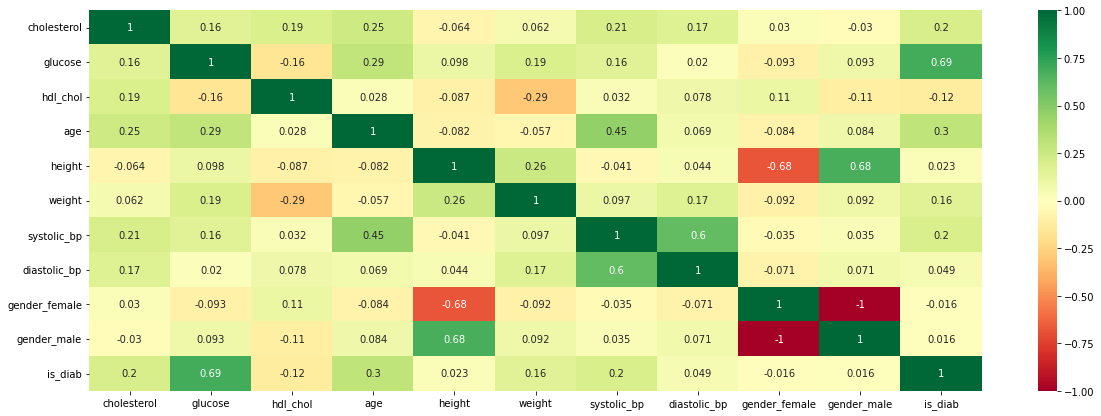

In [318]:
#Heatmap to understand correlation between features
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

Glucose and is_diab are very close to 0.7 which determines multi-collinearity between the two variables

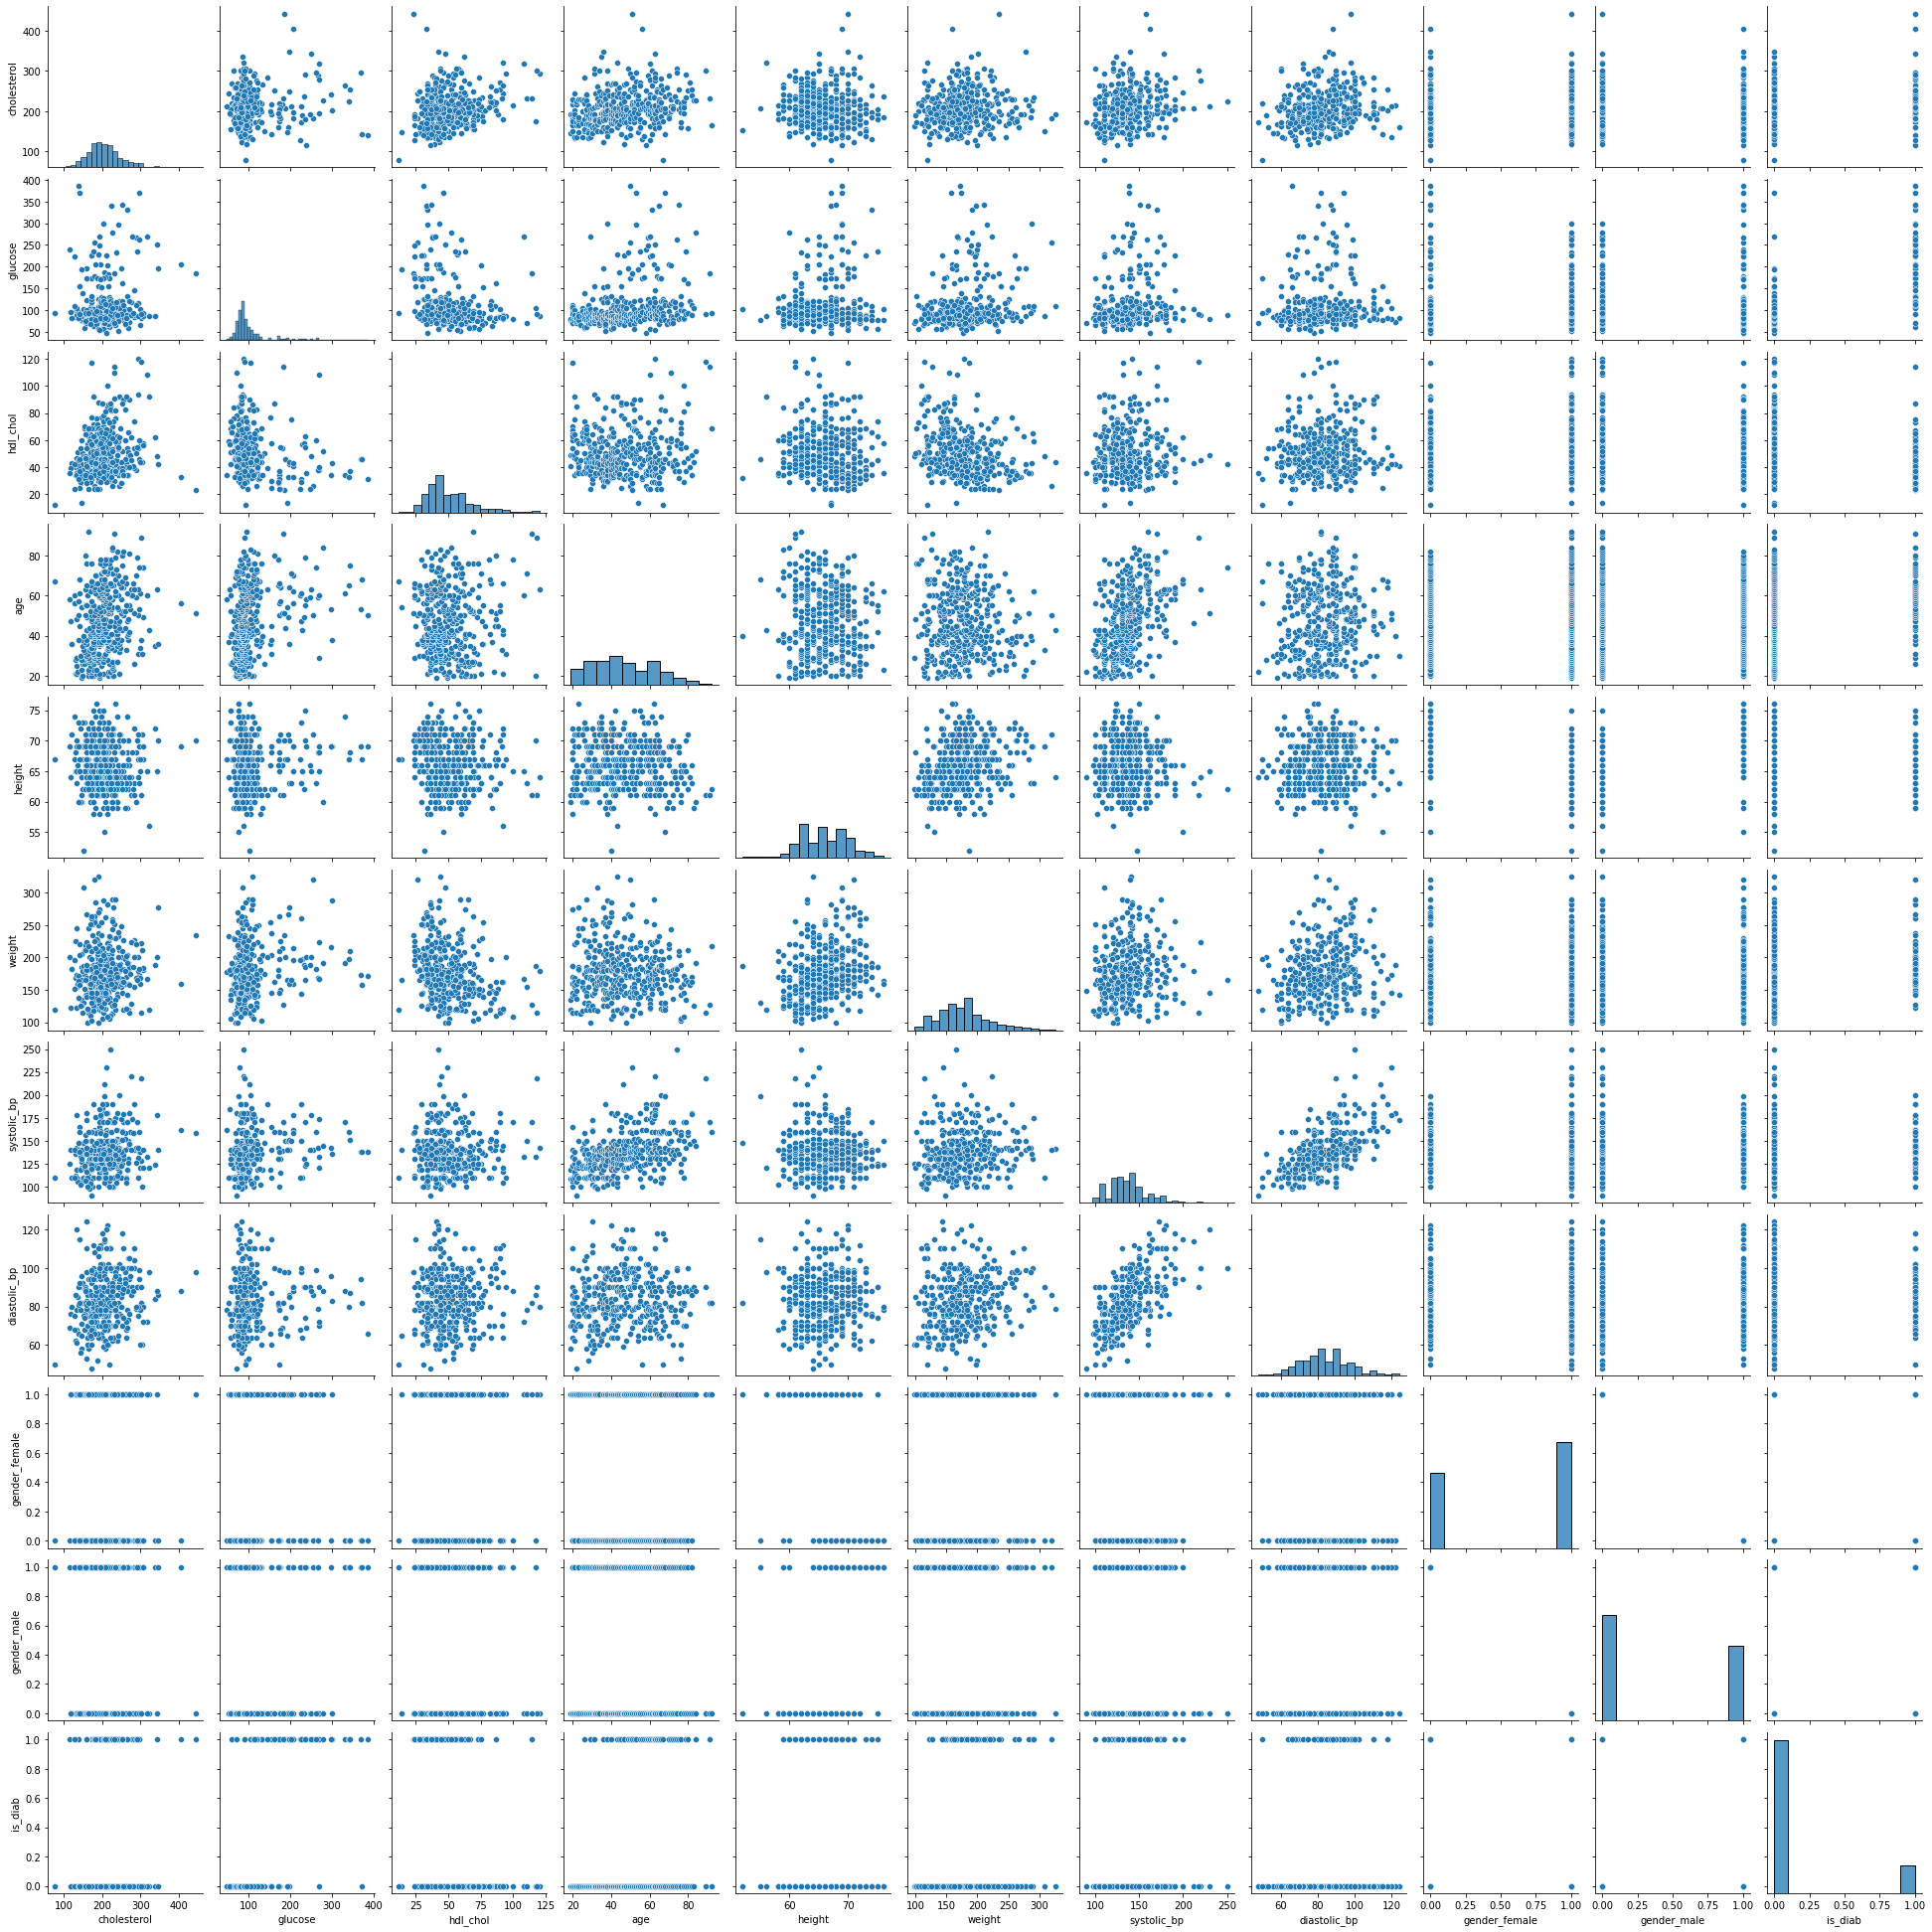

In [319]:
# Pairplot to identify relations between the features and which algorithm would be suitable
sns.pairplot(df)

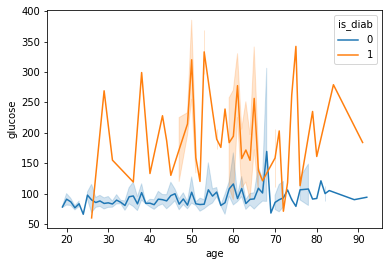

In [320]:
#show the line plot of age and glucose with respect to diabetes
sns.lineplot(x = 'age', y = 'glucose', hue='is_diab', data=df)
plt.show()

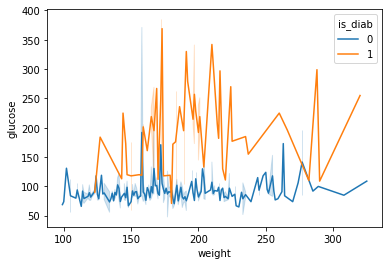

In [321]:
#show the line plot for weight and glucose with respect to diabetes
sns.lineplot(x='weight',y='glucose',hue='is_diab',data=df)
plt.show()

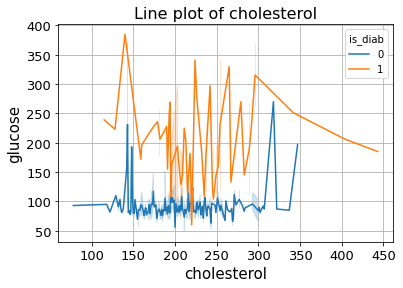

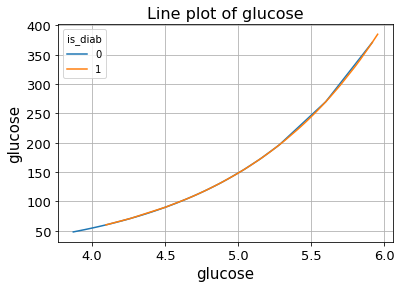

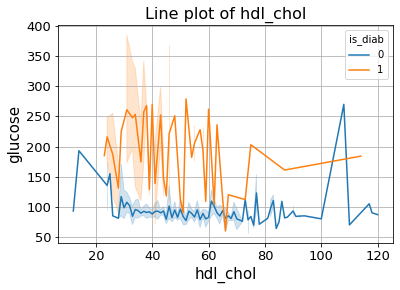

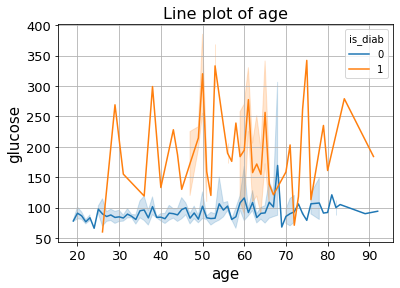

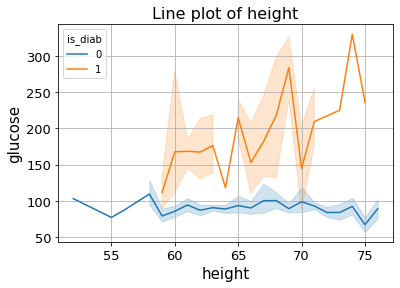

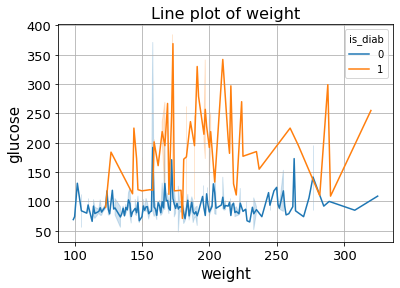

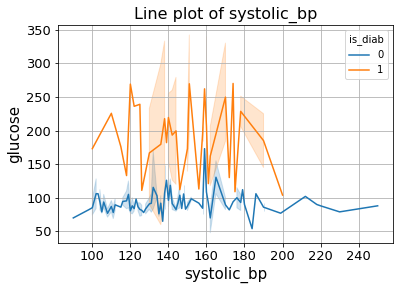

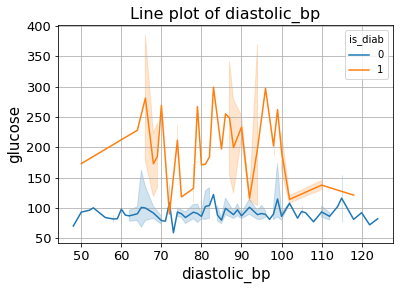

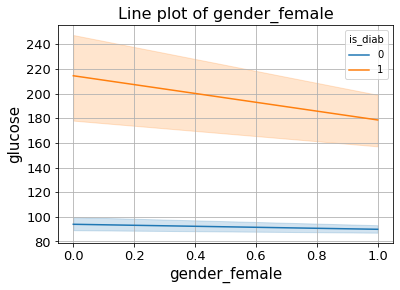

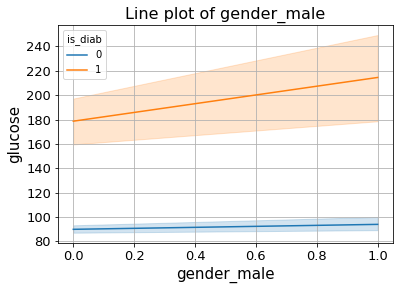

In [322]:
#shows line plot for every feature keeping glucose constant one y axis and with respect to diabetes
for c in data.columns[:]:
  fig=sns.lineplot(x=data[c],y='glucose',hue='is_diab',data=df)
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("{}".format(c),fontsize=15)
  plt.ylabel("glucose",fontsize=15)
  plt.title("Line plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

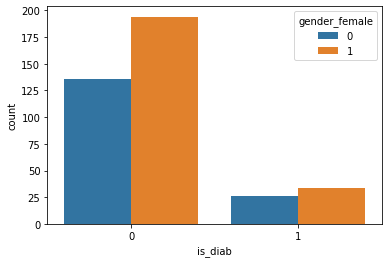

In [323]:
#shows the count plot for diabetes with respect to gender
sns.countplot(x='is_diab', hue='gender_female',data=df)
plt.show()

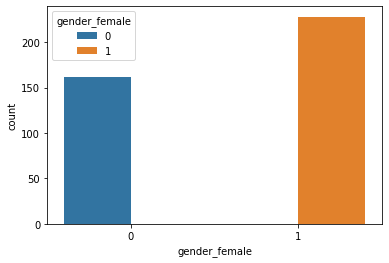

In [324]:
sns.countplot(x='gender_female', hue='gender_female',data=df)
plt.show()

# Removing 1%, 5%, and 10% of data randomly and imputing the values back

As the dataset used had no missing values, tried randomly removing the data from glucose feature and imputing them back and checked the difference occurred using three different methods.

They are as follows:
1. KNN Imputer Method
2. Mean Imputation
3. Mice Algorithm for data imputation

In [325]:
df_glucose = df[['glucose']]
df_glucose['glucose_copy_1_percent'] = df[['glucose']]
df_glucose['glucose_copy_5_percent'] = df[['glucose']]
df_glucose['glucose_copy_10_percent'] = df[['glucose']]
df_glucose

<ipython-input-325-f4f5f797daf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glucose['glucose_copy_1_percent'] = df[['glucose']]
<ipython-input-325-f4f5f797daf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glucose['glucose_copy_5_percent'] = df[['glucose']]
<ipython-input-325-f4f5f797daf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,glucose,glucose_copy_1_percent,glucose_copy_5_percent,glucose_copy_10_percent
0,77,77,77,77
1,79,79,79,79
2,75,75,75,75
3,97,97,97,97
4,91,91,91,91
...,...,...,...,...
385,105,105,105,105
386,279,279,279,279
387,90,90,90,90
388,184,184,184,184


# Checking % missing values in the dataframe

In [326]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [327]:
get_percent_missing(df_glucose)

,column_name,percent_missing
glucose,glucose,0.0
glucose_copy_1_percent,glucose_copy_1_percent,0.0
glucose_copy_5_percent,glucose_copy_5_percent,0.0
glucose_copy_10_percent,glucose_copy_10_percent,0.0


In [328]:
#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [329]:
# Create missing data in each col
create_missing(df_glucose, 0.01, 'glucose_copy_1_percent')
create_missing(df_glucose, 0.05, 'glucose_copy_5_percent')
create_missing(df_glucose, 0.1, 'glucose_copy_10_percent')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [330]:
get_percent_missing(df_glucose)

,column_name,percent_missing
glucose,glucose,0.000000
glucose_copy_1_percent,glucose_copy_1_percent,1.025641
glucose_copy_5_percent,glucose_copy_5_percent,5.128205
glucose_copy_10_percent,glucose_copy_10_percent,10.000000


In [331]:
# Store the indices of missing rows
glucose_1_idx = list(np.where(df_glucose['glucose_copy_1_percent'].isna())[0])
glucose_5_idx = list(np.where(df_glucose['glucose_copy_5_percent'].isna())[0])
glucose_10_idx = list(np.where(df_glucose['glucose_copy_10_percent'].isna())[0])

In [332]:
print(f"Length of glucose_1_idx is {len(glucose_1_idx)} and it contains {(len(glucose_1_idx)/len(df_glucose['glucose_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_glucose['glucose_copy_1_percent'])}")
print(f"Length of glucose_5_idx is {len(glucose_5_idx)} and it contains {(len(glucose_5_idx)/len(df_glucose['glucose_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_glucose['glucose_copy_1_percent'])}")
print(f"Length of glucose_10_idx is {len(glucose_10_idx)} and it contains {(len(glucose_10_idx)/len(df_glucose['glucose_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_glucose['glucose_copy_1_percent'])}")

Length of glucose_1_idx is 4 and it contains 1.0256410256410255% of total data in column | Total rows: 390
Length of glucose_5_idx is 20 and it contains 5.128205128205128% of total data in column | Total rows: 390
Length of glucose_10_idx is 39 and it contains 10.0% of total data in column | Total rows: 390


Checking missing data in each column

In [333]:
df_glucose.isnull().sum()

glucose                     0
glucose_copy_1_percent      4
glucose_copy_5_percent     20
glucose_copy_10_percent    39
dtype: int64

Method 1 : KNN Imputer

In [334]:
#perfomring scaling before KNN imputation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_glucose = pd.DataFrame(scaler.fit_transform(df_glucose))
df_glucose.head()

#knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_glucose = pd.DataFrame(imputer.fit_transform(df_glucose))

#checking for missing values
df_glucose.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [335]:
#Calculating average difference between the actual values and the imputed values
print('Variance in 1% imputation column is - ', df_glucose[0].mean() - df_glucose[1].mean())
print('Variance in 5% imputation column is - ', df_glucose[0].mean() - df_glucose[2].mean())
print('Variance in 10% imputation column is - ', df_glucose[0].mean() - df_glucose[3].mean())

Variance in 1% imputation column is -  0.0
Variance in 5% imputation column is -  0.0001293464201475858
Variance in 10% imputation column is -  1.0144817266438677e-05


Method 2 : Mean Imputation

In [336]:
df_glucose = df[['glucose']]
df_glucose['glucose_copy_1_percent'] = df[['glucose']]
df_glucose['glucose_copy_5_percent'] = df[['glucose']]
df_glucose['glucose_copy_10_percent'] = df[['glucose']]
df_glucose

def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df
  
get_percent_missing(df_glucose)

#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Create missing data in each col
create_missing(df_glucose, 0.01, 'glucose_copy_1_percent')
create_missing(df_glucose, 0.05, 'glucose_copy_5_percent')
create_missing(df_glucose, 0.1, 'glucose_copy_10_percent')

get_percent_missing(df_glucose)

# Store the indices of missing rows
glucose_1_idx = list(np.where(df_glucose['glucose_copy_1_percent'].isna())[0])
glucose_5_idx = list(np.where(df_glucose['glucose_copy_5_percent'].isna())[0])
glucose_10_idx = list(np.where(df_glucose['glucose_copy_10_percent'].isna())[0])

print(f"Length of glucose_1_idx is {len(glucose_1_idx)} and it contains {(len(glucose_1_idx)/len(df_glucose['glucose_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_glucose['glucose_copy_1_percent'])}")
print(f"Length of glucose_5_idx is {len(glucose_5_idx)} and it contains {(len(glucose_5_idx)/len(df_glucose['glucose_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_glucose['glucose_copy_1_percent'])}")
print(f"Length of glucose_10_idx is {len(glucose_10_idx)} and it contains {(len(glucose_10_idx)/len(df_glucose['glucose_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_glucose['glucose_copy_1_percent'])}")

df_glucose.isnull().sum()


Length of glucose_1_idx is 4 and it contains 1.0256410256410255% of total data in column | Total rows: 390
Length of glucose_5_idx is 20 and it contains 5.128205128205128% of total data in column | Total rows: 390
Length of glucose_10_idx is 39 and it contains 10.0% of total data in column | Total rows: 390


<ipython-input-336-702602b6478a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glucose['glucose_copy_1_percent'] = df[['glucose']]
<ipython-input-336-702602b6478a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glucose['glucose_copy_5_percent'] = df[['glucose']]
<ipython-input-336-702602b6478a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

glucose                     0
glucose_copy_1_percent      4
glucose_copy_5_percent     20
glucose_copy_10_percent    39
dtype: int64

In [337]:
#Applying mean to all the columns where data is missing
df_glucose['glucose_copy_1_percent'] = df_glucose['glucose_copy_1_percent'].fillna(df_glucose['glucose_copy_1_percent'].mean())
df_glucose['glucose_copy_5_percent'] = df_glucose['glucose_copy_5_percent'].fillna(df_glucose['glucose_copy_5_percent'].mean())
df_glucose['glucose_copy_10_percent'] = df_glucose['glucose_copy_10_percent'].fillna(df_glucose['glucose_copy_10_percent'].mean())
df_glucose.isnull().sum()

<ipython-input-337-dca953b4894f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glucose['glucose_copy_1_percent'] = df_glucose['glucose_copy_1_percent'].fillna(df_glucose['glucose_copy_1_percent'].mean())
<ipython-input-337-dca953b4894f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glucose['glucose_copy_5_percent'] = df_glucose['glucose_copy_5_percent'].fillna(df_glucose['glucose_copy_5_percent'].mean())
<ipython-input-337-dca953b4894f>:4: SettingWithCopyWarning: 
A value is trying to be set on 

glucose                    0
glucose_copy_1_percent     0
glucose_copy_5_percent     0
glucose_copy_10_percent    0
dtype: int64

In [338]:
#Calculating average difference between the actual values and the imputed values
print('Variance in 1% imputation column is - ', df_glucose['glucose'].mean() - df_glucose['glucose_copy_1_percent'].mean())
print('Variance in 5% imputation column is - ', df_glucose['glucose'].mean() - df_glucose['glucose_copy_5_percent'].mean())
print('Variance in 10% imputation column is - ', df_glucose['glucose'].mean() - df_glucose['glucose_copy_10_percent'].mean())

Variance in 1% imputation column is -  -0.2366679952172035
Variance in 5% imputation column is -  0.5790020790020947
Variance in 10% imputation column is -  1.8000000000000114


Method 3 : Mice Algorithm

In [339]:
df_glucose = df[['glucose']]
df_glucose['glucose_copy_1_percent'] = df[['glucose']]
df_glucose['glucose_copy_5_percent'] = df[['glucose']]
df_glucose['glucose_copy_10_percent'] = df[['glucose']]
df_glucose

def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df
  
get_percent_missing(df_glucose)

#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Create missing data in each col
create_missing(df_glucose, 0.01, 'glucose_copy_1_percent')
create_missing(df_glucose, 0.05, 'glucose_copy_5_percent')
create_missing(df_glucose, 0.1, 'glucose_copy_10_percent')

get_percent_missing(df_glucose)

# Store the indices of missing rows
glucose_1_idx = list(np.where(df_glucose['glucose_copy_1_percent'].isna())[0])
glucose_5_idx = list(np.where(df_glucose['glucose_copy_5_percent'].isna())[0])
glucose_10_idx = list(np.where(df_glucose['glucose_copy_10_percent'].isna())[0])

print(f"Length of glucose_1_idx is {len(glucose_1_idx)} and it contains {(len(glucose_1_idx)/len(df_glucose['glucose_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_glucose['glucose_copy_1_percent'])}")
print(f"Length of glucose_5_idx is {len(glucose_5_idx)} and it contains {(len(glucose_5_idx)/len(df_glucose['glucose_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_glucose['glucose_copy_1_percent'])}")
print(f"Length of glucose_10_idx is {len(glucose_10_idx)} and it contains {(len(glucose_10_idx)/len(df_glucose['glucose_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_glucose['glucose_copy_1_percent'])}")

df_glucose.isnull().sum()

Length of glucose_1_idx is 4 and it contains 1.0256410256410255% of total data in column | Total rows: 390
Length of glucose_5_idx is 20 and it contains 5.128205128205128% of total data in column | Total rows: 390
Length of glucose_10_idx is 39 and it contains 10.0% of total data in column | Total rows: 390


<ipython-input-339-702602b6478a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glucose['glucose_copy_1_percent'] = df[['glucose']]
<ipython-input-339-702602b6478a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glucose['glucose_copy_5_percent'] = df[['glucose']]
<ipython-input-339-702602b6478a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

glucose                     0
glucose_copy_1_percent      4
glucose_copy_5_percent     20
glucose_copy_10_percent    39
dtype: int64

In [340]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data=imp.fit_transform(data)

#checking for missing values
df_glucose.isnull().sum()
print('\n Values are inserted with MICE Imputer successfully!')

[IterativeImputer] Completing matrix with shape (390, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.01
[IterativeImputer] Change: 0.0, scaled tolerance: 0.443 
[IterativeImputer] Early stopping criterion reached.

 Values are inserted with MICE Imputer successfully!


In [341]:
#Calculating average difference between the actual values and the imputed values
print('Variance in 1% imputation column is - ', df_glucose['glucose'].mean() - df_glucose['glucose_copy_1_percent'].mean())
print('Variance in 5% imputation column is - ', df_glucose['glucose'].mean() - df_glucose['glucose_copy_5_percent'].mean())
print('Variance in 10% imputation column is - ', df_glucose['glucose'].mean() - df_glucose['glucose_copy_10_percent'].mean())

Variance in 1% imputation column is -  -0.14340374651254706
Variance in 5% imputation column is -  0.9114345114345213
Variance in 10% imputation column is -  0.7829059829059872


In [342]:
df.head()

,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,diabetes,gender_female,gender_male,is_diab
0,193,77,49,19,61,119,118,70,No diabetes,1,0,0
1,146,79,41,19,60,135,108,58,No diabetes,1,0,0
2,217,75,54,20,67,187,110,72,No diabetes,1,0,0
3,226,97,70,20,64,114,122,64,No diabetes,1,0,0
4,164,91,67,20,70,141,122,86,No diabetes,1,0,0


# Building and Training Model KNN

In [343]:
#Defining values for X and y
X = df[['cholesterol','glucose','hdl_chol','age','height','weight','systolic_bp','diastolic_bp','gender_female','gender_male']]
y = df['is_diab']

In [344]:
from sklearn.model_selection import train_test_split

#Spliting data into Training 60% and Test set 40%

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [345]:
from sklearn.neighbors import KNeighborsClassifier

#Fitting the data into KNN algorithm
kNN = KNeighborsClassifier(n_neighbors = 2)
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [346]:
kNN1 = KNeighborsClassifier(n_neighbors = 3)
kNN1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [347]:
kNN2 = KNeighborsClassifier(n_neighbors = 4)
kNN2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [348]:
#Predicting the results for y=Diabetes
y_pred = kNN.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [349]:
y_pred1 = kNN1.predict(X_test)
y_pred2 = kNN2.predict(X_test)

# Metrics Score

In [350]:
from sklearn import metrics

#calculating the accuracy score using KNN model

print("kNN model accuracy when n = 2 :", metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_test,y_pred))
print("kNN model accuracy when n = 3 :", metrics.accuracy_score(y_test, y_pred1))
print('Confusion Matrix:', metrics.confusion_matrix(y_test,y_pred1))
print("kNN model accuracy when n = 4 :", metrics.accuracy_score(y_test, y_pred2))
print('Confusion Matrix:', metrics.confusion_matrix(y_test,y_pred))

kNN model accuracy when n = 2 : 0.8974358974358975
Confusion Matrix: [[128   2]
 [ 14  12]]
kNN model accuracy when n = 3 : 0.9038461538461539
Confusion Matrix: [[126   4]
 [ 11  15]]
kNN model accuracy when n = 4 : 0.9038461538461539
Confusion Matrix: [[128   2]
 [ 14  12]]


# Identifying the predictor significance

In [351]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['is_diab'], df[['cholesterol','glucose','hdl_chol','age','height','weight','systolic_bp','diastolic_bp','gender_female','gender_male']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                is_diab   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     41.96
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           8.67e-52
Time:                        02:59:16   Log-Likelihood:                -21.251
No. Observations:                 390   AIC:                             62.50
Df Residuals:                     380   BIC:                             102.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cholesterol       0.0006      0.000      1.998      0.046    1.02e-05       0.001
glucose           0.0043      0.000     16.096      0.000       0.004       0.005
hdl_chol         -0.0008      0.001     -0.932      0.352      -0.002       0.001
age               0.0018      0.001      1.804      0.072      -0.000       0.004
height            0.0003      0.005      0.068      0.946      -0.009       0.010
weight            0.0003      0.000      0.775      0.439      -0.000       0.001
systolic_bp       0.0007      0.001      0.875      0.382      -0.001       0.002
diastolic_bp     -0.0002      0.001     -0.182      0.855      -0.003       0.002
gender_female    -0.6189      0.322     -1.921      0.055      -1.252       0.015
gender_male      -0.6621      0.347     -1.908      0.057      -1.344       0.020
==============================================================================
Omnibus:                      118.451   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.267
Skew:                           1.249   Prob(JB):                    2.37e-114
Kurtosis:                       8.095   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Notes



1.   Standard Errors assume that the covariance matrix of the errors is correctly specified.
2.   Considering the significance value of 0.05 because accuracy in predicting diabetes with diagnostic measures is not that critical



1.   The **cholesterol** has the p-value **0.046**, which is greater and hence it is a non significant feature.
2.   The **glucose** has the p-value **0.000**, which is lesser and hence it is a significant feature.
3.   The **hdl_chol** has the p-value **0.352**, which is greater and hence it is a non significant feature.
4.   The **age** has the p-value **0.072**, which is greater and hence it is a non significant feature.
5.   The **height** has the p-value **0.946**, which is lesser and hence it is a significant feature.
6.   The **weight** has the p-value **0.439**, which is greater and hence it is a non significant feature.
7.   The **systolic_bp** has the p-value **0.382**, which is greater and hence it is a non significant feature.
8.   The **diastolic_bp** has the p-value **0.855**, which is greater and hence it is a non significant feature.
9.   The **gender_female** has the p-value **0.055**, which is closer to 0.05 and hence it is a significant feature.
10.   The **gender_male** has the p-value **0.057**, which is closer to 0.05 and hence it is a non significant feature.














# Understanding the Important Features

In [352]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(kNN2, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1346 ± 0.0292,glucose
0.0141 ± 0.0126,hdl_chol
0.0090 ± 0.0063,weight
0.0064 ± 0.0140,systolic_bp
0.0026 ± 0.0131,diastolic_bp
0 ± 0.0000,gender_male
0 ± 0.0000,gender_female
0 ± 0.0000,height
-0.0026 ± 0.0131,cholesterol
-0.0038 ± 0.0154,age


**The permutation importance also aligns with the p-value of OLS Regression result and glucose turns out to be the most significant value in predicting the diabetes**

# Building a Logistic Regression Model

In [354]:
from sklearn.model_selection import train_test_split

X = df[['cholesterol','glucose','hdl_chol','age','height','weight','systolic_bp','diastolic_bp','gender_female','gender_male']]
y = df['is_diab']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [355]:
X_test_plot = X_test[['cholesterol','glucose','hdl_chol','age','height','weight','systolic_bp','diastolic_bp','gender_female','gender_male']]

X_val_plot = X_val[['cholesterol','glucose','hdl_chol','age','height','weight','systolic_bp','diastolic_bp','gender_female','gender_male']]

X_train_plot = X_train[['cholesterol','glucose','hdl_chol','age','height','weight','systolic_bp','diastolic_bp','gender_female','gender_male']]

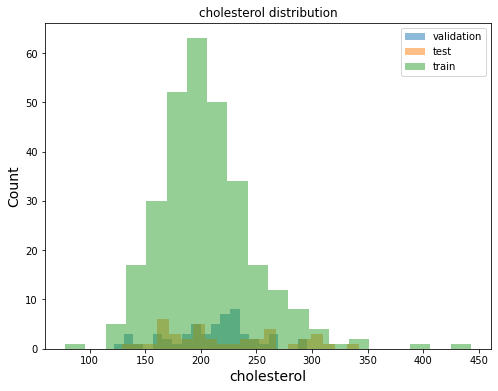

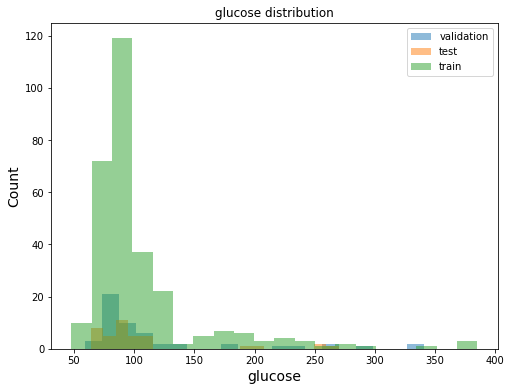

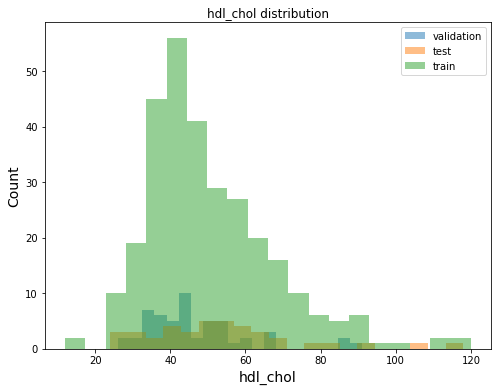

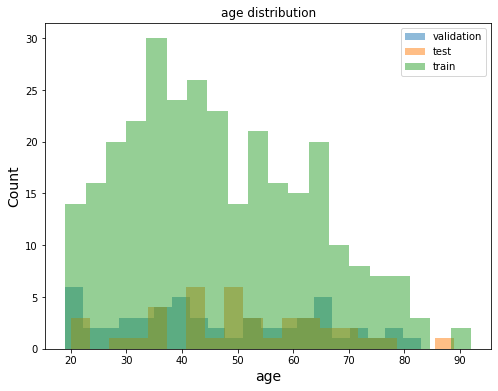

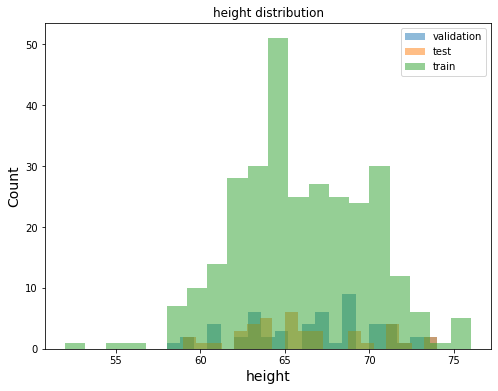

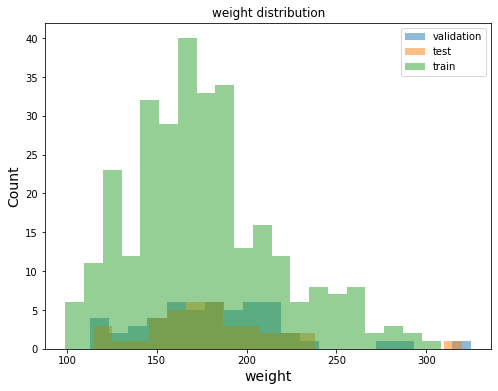

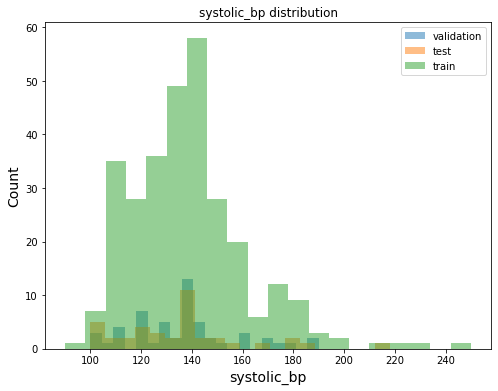

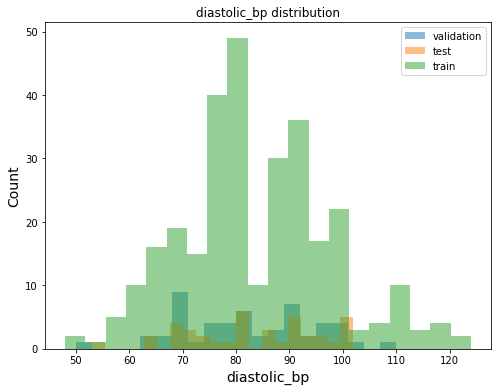

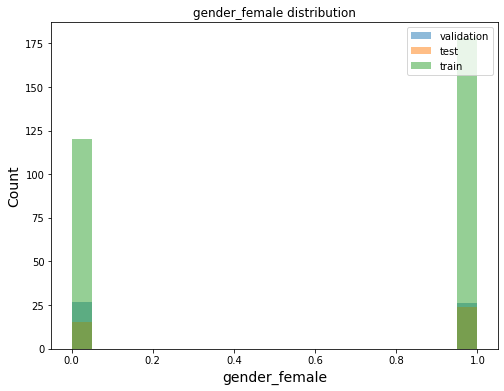

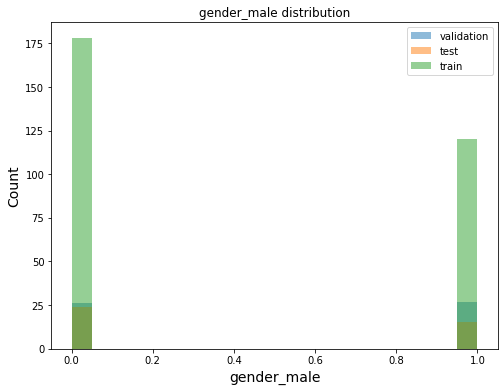

In [356]:
# Plotting the data to see the histogram distribution
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

# Logistic Regression

In [357]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [358]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [359]:
# Make predictions using the training set
y_pred = reg.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
acc = accuracy_score(y_train,y_pred)
print('Accuracy score =',acc)
print('Confusion Matrix:', confusion_matrix(y_train,y_pred))

Mean squared error: 0.07
Coefficient of determination: 0.39
R^2 score on training set = 0.3902529761904763
Accuracy score = 0.9261744966442953
Confusion Matrix: [[252   4]
 [ 18  24]]


In [360]:
# Make predictions using the validation set
y_pred = reg.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
acc = accuracy_score(y_val,y_pred)
print('Accuracy score =',acc)
print('Confusion Matrix:', confusion_matrix(y_val,y_pred))

Mean squared error: 0.09
Coefficient of determination: 0.49
R^2 score on validation set = 0.49038461538461553
Accuracy score = 0.9056603773584906
Confusion Matrix: [[40  0]
 [ 5  8]]


In [361]:
# Make predictions using the test set
y_pred = reg.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2_test = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy score =',acc)
print('Confusion Matrix:', confusion_matrix(y_test,y_pred))

Mean squared error: 0.05
Coefficient of determination: 0.54
R^2 score on test set = 0.5411764705882354
Accuracy score = 0.9487179487179487
Confusion Matrix: [[33  1]
 [ 1  4]]


# Understanding Important Features

In [362]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1949 ± 0.0251,glucose
0 ± 0.0000,gender_male
0 ± 0.0000,gender_female
0 ± 0.0000,diastolic_bp
0 ± 0.0000,systolic_bp
0 ± 0.0000,weight
0 ± 0.0000,height
0 ± 0.0000,age
0 ± 0.0000,hdl_chol
0 ± 0.0000,cholesterol


**The permutation importance is also aligned with the P values where glucose is a significant value and rest all are not**

# Removing Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


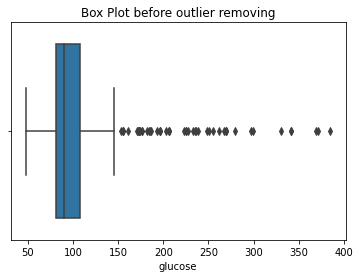

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


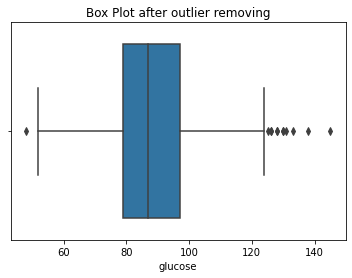

In [363]:
#removing outliers for glucose
sns.boxplot(df['glucose'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'glucose')
sns.boxplot(df['glucose'])
plt.title("Box Plot after outlier removing")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


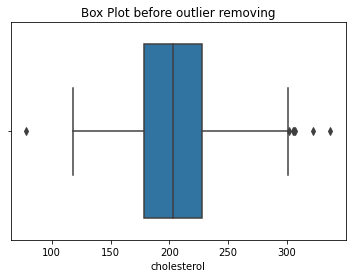

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


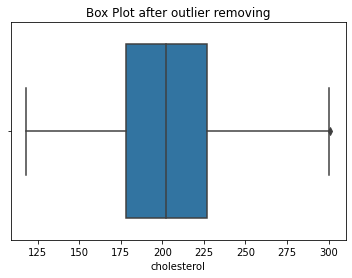

In [364]:
#removing outliers for cholesterol
sns.boxplot(df['cholesterol'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'cholesterol')
sns.boxplot(df['cholesterol'])
plt.title("Box Plot after outlier removing")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


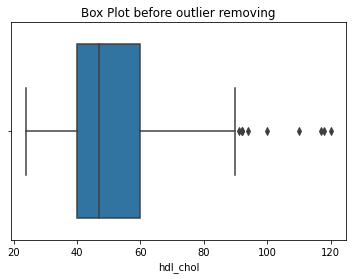

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


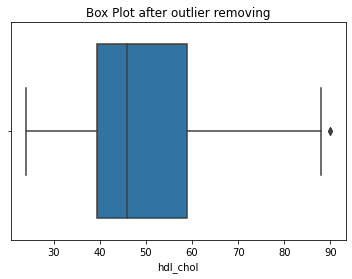

In [365]:
#removing outliers for hdl_chol
sns.boxplot(df['hdl_chol'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'hdl_chol')
sns.boxplot(df['hdl_chol'])
plt.title("Box Plot after outlier removing")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


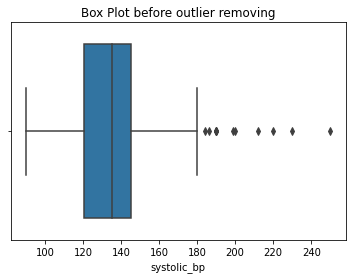

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


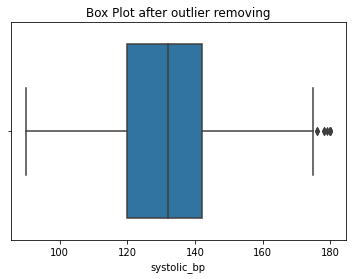

In [366]:
#removing outliers for systolic_bp
sns.boxplot(df['systolic_bp'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'systolic_bp')
sns.boxplot(df['systolic_bp'])
plt.title("Box Plot after outlier removing")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


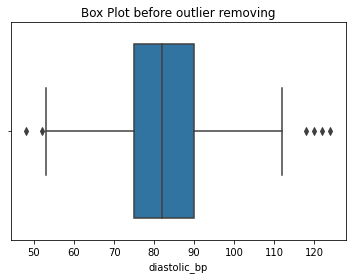

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


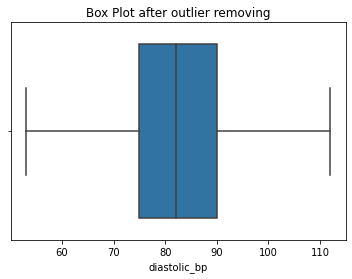

In [367]:
#removing outliers for diastolic_bp
sns.boxplot(df['diastolic_bp'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'diastolic_bp')
sns.boxplot(df['diastolic_bp'])
plt.title("Box Plot after outlier removing")
plt.show()

In [368]:
df.head()

,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,diabetes,gender_female,gender_male,is_diab
0,193,77,49,19,61,119,118,70,No diabetes,1,0,0
1,146,79,41,19,60,135,108,58,No diabetes,1,0,0
2,217,75,54,20,67,187,110,72,No diabetes,1,0,0
3,226,97,70,20,64,114,122,64,No diabetes,1,0,0
4,164,91,67,20,70,141,122,86,No diabetes,1,0,0


In [369]:
df.shape

(305, 12)

# Executing Logistic Regression after removing Outliers

In [370]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [371]:
from sklearn.model_selection import train_test_split

X1 = df[['cholesterol','glucose','hdl_chol','age','height','weight','systolic_bp','diastolic_bp','gender_female','gender_male']]
y1 = df['is_diab']

# Spliting data into Training 60% and Test set 40%

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=1)

In [372]:
reg1 = LogisticRegression()
reg1.fit(X1_train,y1_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [373]:
# Make predictions using the test set
y1_pred = reg1.predict(X1_test)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y1_test, y1_pred))
r2_test = r2_score(y1_test,y1_pred)
print('R^2 score on test set =',r2_test)
acc = accuracy_score(y1_test,y1_pred)
print('Accuracy score =',acc)
print('Confusion Matrix:', confusion_matrix(y1_test,y1_pred))

Mean squared error: 0.05
Coefficient of determination: 0.09
R^2 score on test set = 0.09068322981366439
Accuracy score = 0.9508196721311475
Confusion Matrix: [[115   0]
 [  6   1]]


**After removing Outliers it has been observed that accuracy score for logistic regression was increased by 0.01** 

# Answer the following questions

* What are the likely distributions of the numeric variables?

Ans: **Numeric variables for this dataset are 'cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'gender_female', 'gender_male'. When qq-plot was plotted for these variables it was observed that 'cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp' roughly follow normal distribution curve.**

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Ans: **Three methods use to determine which variables are important for prediction are correlation matrix, calculating p-value and plotting independent variable against target variable. From all these three methods the most important independent variables are glucose, hdl_chol, weight, systolic_bp, diastolic_bp.**

* Which independent variables have missing data? How much? 

Ans: **No independent variables have any missing data or zeros.**

* Do the training and test sets have the same data?

Ans: **No, in KNN model the train and test data are split into 60:40 ratio respectively. Also in logistic Regression model the train, validation and test data are split into 75:15:10 ration respectively.**

* Are the predictor variables independent of all the other predictor variables?

Ans: **Yes, mostly all features are independent of eachother, this can be inferred from the correlation matrix and heatmap plot. Except glucose and diabetes features closely resemble multi-colinearity as the correlation is nearly equal to 0.7.**

* Which predictor variables are the most important?

Ans: 	Below is the rank of predictors:
1. **glucose**
2. **hdl_chol**
3. **weight**
4. **systolic_bp**
5. **diastolic_bp**
6. **gender_male**
7. **gender_female**
8. **height**
9. **cholesterol**
10.**age**

* Do the ranges of the predictor variables make sense?

Ans: 
1. **Yes, predictor variables make sense as when analyzed the qq-plot every other feature follows the normalisation except for a few values of glucose feature.**
2. **It was observed there are outliers in cholesterol, glucose, hdl_chol, systolic_bp, diastolic_bp**
3. **All almost all variables are independent except glucose and is_diab(Diabetes) correlation value is 0.69 which is close to 0.7 hence we can infer that they have multi-collinearity.**
4. **Gender was encoded into two different columns gender_female and gender_male** 

* What are the distributions of the predictor variables?   

Ans:
1. **Looking at the Q-Q plots, it appears that all independent variables are
roughly following normal distribution** 
2. **Observing the line plots, all the independent variables are clearly distributed against diabetes to know the trend**
3. **Gender is categorical value and have 2 different values namely Male and Female also Diabetes is categorical with values Diabetes and No Diabetes**

* Remove outliers and keep outliers (does it have an effect of the final predictive model)?

Ans: 
1. **Keeping the outliers, Logistic regression was performed on the model and it was found the accuracy was 0.94871**
2. **After removing the outliers, Logistic regression was again performed on the model and it was found the accuracy rose by 0.01 and was 0.9508**

**Removing Outliers helped in calculating better accuracy for the model.**


# Conclusion

From the analysis done with the above dataset we can conclude that most variables are independent of each other, glucose and diabetes closely show multi-collinearity.

Glucose has the significant value from all the independent variables

# References

1. Scikit learn official documentation
2. Referred Towards Data Science
3. Eli5 official documentation
The algorithms were referred directly from the Scikit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documentation
4. Kaggle notebooks for prediction of diabetes using diagnotic measures
5. Notebook for reference : https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

# License

Copyright 2023 Shreyas Dasari

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.